## Dataset Explanation

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.We will try to figure out their survival rate based on the available dataset.



The dataset consists of following columns:
-    Age of patient at time of operation(numerical)
-    Patient's year of operation (year - 1900, numerical)
-    Number of positive axillary nodes detected (numerical)
-    Survival status (class attribute): 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year

## Objective

To find whether the patient will survive more than 5 years or die within five year based on age of patient,year of operation and number of positive axillary nodes 

## Exploratory data analysis(EDA)

As first step we will import necessery libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

By default we have column names as 30.64,1 and 1.1.we will change it based on the information that we got from kaggle.

In [2]:
df = pd.read_csv('haberman.csv',names=['age','year_of_operation','axillarynodes','survivalstatus'])

In [5]:
#As first step we will try to view head of the dataset
df.head()

,age,year_of_operation,axillarynodes,survivalstatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


We can see that in survivalstatus it is given 1 for survived and 2 for not survived.It looks not good for EDA.so we will change 1 as 'survived' and 2 as 'notsurvived' by maping it.Also we want to change it to 'category' type.

In [3]:
df['survivalstatus'] = df['survivalstatus'].map({1:'survived',2:'notsurvived'})
df['survivalstatus'] = df['survivalstatus'].astype('category')

In [7]:
df.head()

,age,year_of_operation,axillarynodes,survivalstatus
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


In [8]:
df.describe()

,age,year_of_operation,axillarynodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [9]:
#now we will check the shape of our dataframe
df.shape

(306, 4)

It consisits of 306 rows and 4 columns.

In [5]:
df['survivalstatus'].value_counts()

survived       225
notsurvived     81
Name: survivalstatus, dtype: int64

### Observations 

-    Total number of rows is 306 and columns is 4
-    There are no missing values
-    About 25% of people have no axilary nodes detected.
-    Mean age of people is 52
-    We can see that there are 225 people survived and 81 people not survived.As 225 is almost triple of 81,we can see that our target set is slightly imbalenced.

## Univarient Analysis

### Distribution plots

C:\Users\arun\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\arun\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


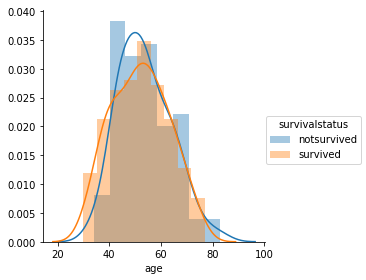

In [11]:
sns.FacetGrid(df,hue='survivalstatus',size=4).map(sns.distplot,'age').add_legend()
plt.show()

C:\Users\arun\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\arun\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


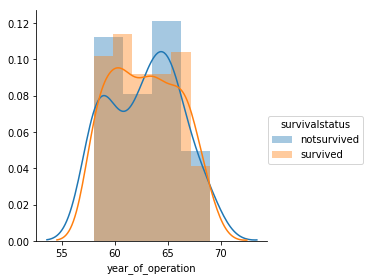

In [12]:
sns.FacetGrid(df,hue='survivalstatus',size=4).map(sns.distplot,'year_of_operation').add_legend()
plt.show()

C:\Users\arun\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\arun\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


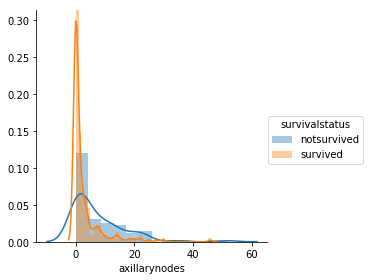

In [13]:
sns.FacetGrid(df,hue='survivalstatus',size=4).map(sns.distplot,'axillarynodes').add_legend()
plt.show()

Observations:
-  Distribution plots for 'age' and 'year_of_operation' are overlapping and we cannot obtain any clear conclusion.
-  From Distribution plot of 'axillarynodes' we can see that among survived people number of auxillary nodes is dense from 0 to 5.

### CDF

survived:
bin_edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
pdf: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
***********************************************
notsurvived:
bin_edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
pdf: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
***********************************************


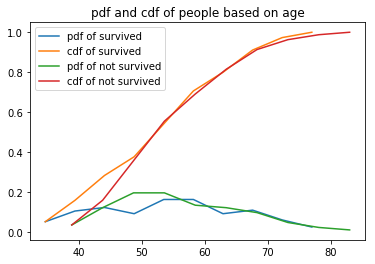

In [6]:
survived = df[df['survivalstatus'] == 'survived']
not_survived = df[df['survivalstatus'] == 'notsurvived']


count,edges = np.histogram(survived['age'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
print('survived:')
print('bin_edges: {}'.format(edges))
print('pdf: {}'.format(pdf))
print('***********************************************')

plt.title('pdf and cdf of people based on age')

count,edges = np.histogram(not_survived['age'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(['pdf of survived','cdf of survived','pdf of not survived','cdf of not survived'])
print('notsurvived:')
print('bin_edges: {}'.format(edges))
print('pdf: {}'.format(pdf))
print('***********************************************')



survived:
bin_edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
pdf: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
***********************************************
notsurvived:
bin_edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
pdf: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
***********************************************


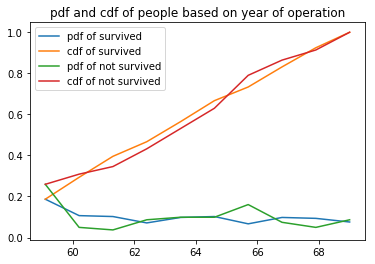

In [8]:
count,edges = np.histogram(survived['year_of_operation'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.title('pdf and cdf of people based on year of operation')
print('survived:')
print('bin_edges: {}'.format(edges))
print('pdf: {}'.format(pdf))
print('***********************************************')

count,edges = np.histogram(not_survived['year_of_operation'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(['pdf of survived','cdf of survived','pdf of not survived','cdf of not survived'])
print('notsurvived:')
print('bin_edges: {}'.format(edges))
print('pdf: {}'.format(pdf))
print('***********************************************')

survived:
bin_edges: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
pdf: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
***********************************************
notsurvived:
bin_edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
pdf: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
***********************************************


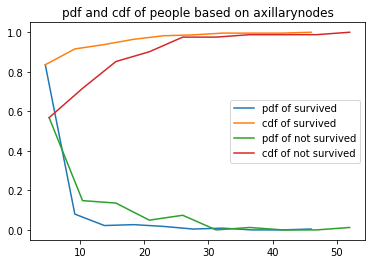

In [16]:
count,edges = np.histogram(survived['axillarynodes'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.title('pdf and cdf of people based on axillarynodes')
print('survived:')
print('bin_edges: {}'.format(edges))
print('pdf: {}'.format(pdf))
print('***********************************************')

count,edges = np.histogram(not_survived['axillarynodes'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(['pdf of survived','cdf of survived','pdf of not survived','cdf of not survived'])
print('notsurvived:')
print('bin_edges: {}'.format(edges))
print('pdf: {}'.format(pdf))
print('***********************************************')

Observations
-    Patients with less that 35 age are defenitly survived
-    Patients operated between 1961 to 1965 have slightly higher rate of survial where as patients operated between 1965 to 1967 have slightly low rate of survival.
-    About 83% of the survived people have less than 5 axillary nodes.Also about 58% of the non survived people have less than 5 auxillary nodes.

### Boxplot

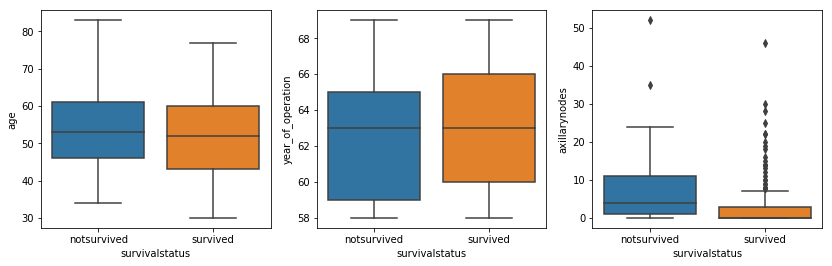

In [17]:
plt.figure(1,figsize=(14,4))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='survivalstatus',y='age')

plt.subplot(1,3,2)
sns.boxplot(data=df,x='survivalstatus',y='year_of_operation')

plt.subplot(1,3,3)
sns.boxplot(data=df,x='survivalstatus',y='axillarynodes')


### Violin plot

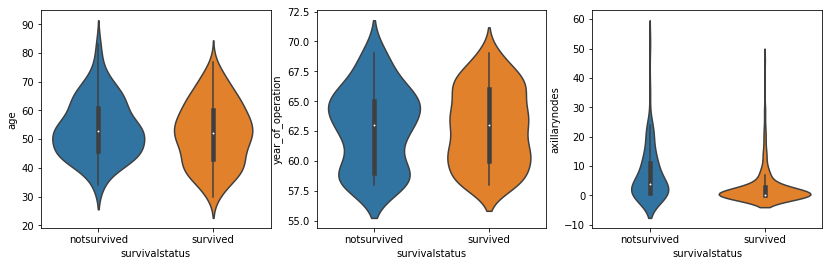

In [18]:
plt.figure(1,figsize=(14,4))
plt.subplot(1,3,1)
sns.violinplot(data=df,x='survivalstatus',y='age')

plt.subplot(1,3,2)
sns.violinplot(data=df,x='survivalstatus',y='year_of_operation')

plt.subplot(1,3,3)
sns.violinplot(data=df,x='survivalstatus',y='axillarynodes')

Observations from boxplot and violinplot:
-    Patients having age less than 35 is defenitly survived and patients with age greater than 75 are defenitly not survived.


## Multi-varient Analysis

### Pairplot

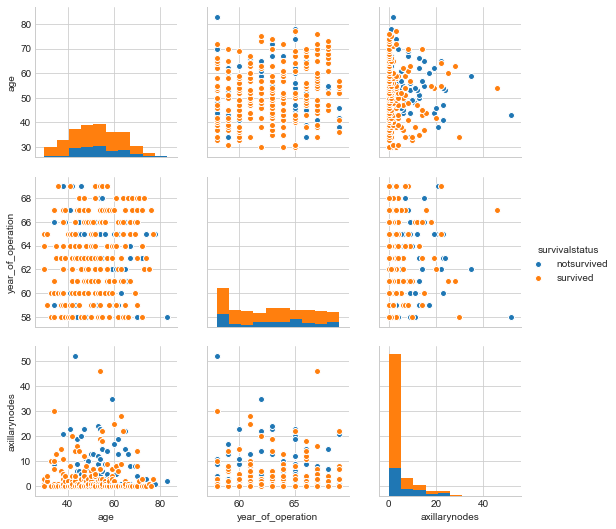

In [20]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='survivalstatus')
plt.show()

Observations
-    No specific information can be obtained from pairplot

## Final Observations:

-   Patients with less than 35 years of will survive 5 years or longer
-   Patients with more than 75 years of will not survive 5 years or longer
-   Patients having less than 5 positive auxillary nodes have slightly high rate of survival
-   Eventhough we can reach at above conclutions we are unable to find out a perfect relation as the dataset is imbalenced.